# Communicate US Airlines Data Findings
## by Ahmed Hashish

## Dataset Overview
> The U.S. Department of Transportation's (DOT) [Bureau of Transportation Statistics](http://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) (BTS) tracks the on-time performance of flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released. There are 292,669 records in our dataset, each record contains monthly statistics for each airline with a certain destination airport.

## Notes
>A flight is considered delayed when it arrived 15 or more minutes than the schedule. Delayed minutes are calculated for delayed flights only.

>When multiple causes are assigned to one delayed flight, each cause is prorated based on delayed minutes it is responsible for. The displayed numbers are rounded and may not add up to the total.

## Preliminary Wrangling

> This document explores a dataset containing approximately 290,000 monthly records of on-time statistics and delay causes for multiple airlines at multiple airports within USA from June, 2003 to December, 2020. we may wrangle these data in order to make it ready for analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Adjust display options for pandas
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

In [2]:
# unzip dataset zipped file
import shutil
shutil.unpack_archive('airline_delay_causes.zip', '.')
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('airline_delay_causes.csv')
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(5)

(292669, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach International",650.0,126.0,21.06,6.44,...,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,...,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,...,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,...,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,...,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN


In [3]:
# descriptive statistics for numeric variables
print(df.describe())
df.info()

                year          month    arr_flights      arr_del15  \
count  292669.000000  292669.000000  292207.000000  291981.000000   
mean     2011.649782       6.567925     388.080032      74.473236   
std         5.204932       3.446558    1039.782554     202.362463   
min      2003.000000       1.000000       1.000000       0.000000   
25%      2007.000000       4.000000      60.000000       9.000000   
50%      2011.000000       7.000000     123.000000      24.000000   
75%      2016.000000      10.000000     278.000000      57.000000   
max      2020.000000      12.000000   21977.000000    6377.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  292207.000000  292207.000000  292207.000000  292207.000000   
mean       20.978171       2.657526      24.953737       0.173288   
std        46.777916      10.129071      87.677313       0.827498   
min         0.000000       0.000000      -0.010000       0.000000   
25%         3.170000       0.0000

In [4]:
# delete empty column
df.drop('Unnamed: 21', axis=1, inplace=True)
# remove white spaces from columns names
df.columns = df.columns.str.replace(' ', '')
# check again
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [5]:
# checking null cells
print(df.isnull().sum())
display(df[df.arr_flights.isnull()].head(2))
display(df[df.arr_del15.isnull() & df.arr_flights.notnull()].head(2))

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            462
arr_del15              688
carrier_ct             462
weather_ct             462
nas_ct                 462
security_ct            462
late_aircraft_ct       462
arr_cancelled          462
arr_diverted           462
arr_delay              462
carrier_delay          462
weather_delay          462
nas_delay              462
security_delay         462
late_aircraft_delay    462
dtype: int64


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1418,2004,2,EV,Atlantic Southeast Airlines,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1427,2004,2,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
19535,2008,1,OO,SkyWest Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",1.0,NaN,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19629,2008,1,OO,SkyWest Airlines Inc.,OGD,"Ogden, UT: Ogden-Hinckley",1.0,NaN,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 462 records should be deleted because these records refer airlines that haven't any flight during a specified month
# to a certain airport
df=df[df.arr_flights.notnull()]
# 226 null values of `arr_del15` that refers to zero number of delayed flights should be replaced with 0 values
df.arr_del15.fillna(0,inplace=True)
# check again
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


### What is the structure of our dataset?

> There are 292,669 records in our dataset, each record contains monthly statistics for each airline at a certain airport. Our dataset variables are listed below:

| Column Name | Description | Proposed Name If Needed |
| :---------- | :---------- | :------------- |
|'year'|Year|| 
|'month'| Month||
|'carrier'| Airline Code|'carrier_code'|
|'carrier_name'|Airline Name| 
|'airport'|Airport Code|'airport_code'|
|'airport_name'|Airport Name|
|'arr_flights'|Number of flights arrived at the airport| 'flights_ct'|
|'arr_del15'|Number of flights delayed (>= 15minutes late)|'all_del_ct'|
|'carrier_ct'|Number of flights delayed due to their airlines|'carrier_del_ct'|
|'weather_ct'|Number of flights delayed due to weather|'weather_del_ct'|
|'nas_ct'|Number of flights delayed due to National Aviation System|'nas_del_ct'|
|'security_ct'|Number of flights delayed due to security|'security_del_ct'|
|'late_aircraft_ct'|Number of flights delayed due to a previous flight using the same aircraft being late|'aircraft_del_ct'|
|'arr_cancelled'|Number of cancelled flights|'cancelled_ct'|
|'arr_diverted'|Number of diverted flights|'diverted_ct'|
|'arr_delay'|Total time (minutes) of delayed flights|'all_del_tm'|
|'carrier_delay'|Total time (minutes) of delayed flights due to their airlines|'carrier_del_tm'|
|'weather_delay'|Total time (minutes) of delayed flights due to weather|'weather_del_tm'|
|'nas_delay'|Total time (minutes) of delayed flights due to National Aviation System|'nas_del_tm'|
|'security_delay'|Total time (minutes) of delayed flights due to security|'security_del_tm'|
|'late_aircraft_delay'|Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late|'aircraft_del_tm'|
 

In [7]:
# rename some columns
df.rename(columns = {'carrier':'carrier_code',
                     'airport':'airport_code',
                     'arr_flights':'flights_ct',
                     'arr_del15':'all_del_ct',
                     'carrier_ct':'carrier_del_ct',
                     'weather_ct':'weather_del_ct',
                    'nas_ct':'nas_del_ct',
                    'security_ct':'security_del_ct',
                     'late_aircraft_ct':'aircraft_del_ct',
                     'arr_cancelled':'cancelled_ct',
                     'arr_diverted':'diverted_ct',
                     'arr_delay':'all_del_tm',
                     'carrier_delay':'carrier_del_tm',
                     'weather_delay':'weather_del_tm',
                     'nas_delay':'nas_del_tm',
                     'security_delay':'security_del_tm',
                     'late_aircraft_delay':'aircraft_del_tm'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292207 entries, 0 to 292668
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             292207 non-null  int64  
 1   month            292207 non-null  int64  
 2   carrier_code     292207 non-null  object 
 3   carrier_name     292207 non-null  object 
 4   airport_code     292207 non-null  object 
 5   airport_name     292207 non-null  object 
 6   flights_ct       292207 non-null  float64
 7   all_del_ct       292207 non-null  float64
 8   carrier_del_ct   292207 non-null  float64
 9   weather_del_ct   292207 non-null  float64
 10  nas_del_ct       292207 non-null  float64
 11  security_del_ct  292207 non-null  float64
 12  aircraft_del_ct  292207 non-null  float64
 13  cancelled_ct     292207 non-null  float64
 14  diverted_ct      292207 non-null  float64
 15  all_del_tm       292207 non-null  float64
 16  carrier_del_tm   292207 non-null  floa

**Notes:** By using columns definitions
- All count columns (`all_del_ct`, `carrier_del_ct`, `weather_del_ct`, `nas_del_ct`, `security_del_ct`, `aircraft_del_ct`, `cancelled_ct`, and `diverted_ct`) should all be  integers because they refer to the number of flights. 
- Also the `all_del_ct` is the total of the count columns (`carrier_del_ct`, `weather_del_ct`, `nas_del_ct`, `security_del_ct`, and `aircraft_del_ct`).
- All time columns (`all_del_tm`, `carrier_del_tm`, `weather_del_tm`, `nas_del_tm`, `security_del_tm`, and `aircraft_del_tm`) should all be  integers because they are rounded to be in minutes only. 
- Also the `all_del_tm` is the total of the time columns (`carrier_del_tm`, `weather_del_tm`, `nas_del_tm`, `security_del_tm`, and `aircraft_del_tm`).

Let's check that

In [8]:
# look for decimals
count_cols=[col for col in df.columns if 'ct' in col]
time_cols=[col for col in df.columns if 'del_tm' in col]
data=[]
for col in count_cols+time_cols:
    data.append(((df[col]%1)>0).sum())
df_decimal = pd.DataFrame(list(zip(count_cols+time_cols, data)), columns =['Name', 'No. of values with decimals']) 
display(df_decimal)
# columns without decimals
Integer_cols=df_decimal[df_decimal['No. of values with decimals']==0]['Name'].to_list()

,Name,No. of values with decimals
0,flights_ct,0
1,all_del_ct,0
2,carrier_del_ct,246367
3,weather_del_ct,154957
4,nas_del_ct,248624
5,security_del_ct,30740
6,aircraft_del_ct,234639
7,cancelled_ct,0
8,diverted_ct,0
9,all_del_tm,0


In [9]:
# calculate differences between the sum of columns 
# ['carrier_del_ct', 'weather_del_ct', 'nas_del_ct', 'security_del_ct', 'aircraft_del_ct'] and the column 'all_del_ct'
ct=['carrier_del_ct', 'weather_del_ct', 'nas_del_ct', 'security_del_ct', 'aircraft_del_ct']
(df['all_del_ct']-df[ct].sum(axis=1)).sort_values(ascending=False)

143372    1.00
83460     1.00
188924    0.02
225034    0.02
207415    0.02
          ... 
184230   -0.02
271485   -0.02
189707   -0.02
33576    -0.02
35606    -0.02
Length: 292207, dtype: float64

differences are acceptable since |differences|<=1

In [10]:
# calculate differences between the sum of columns 
# ['carrier_del_tm','weather_del_tm','nas_del_tm','security_del_tm','aircraft_del_tm'] and the column 'all_del_tm'
tm=['carrier_del_tm','weather_del_tm','nas_del_tm','security_del_tm','aircraft_del_tm']
display((df['all_del_tm']-df[tm].sum(axis=1)).sort_values(ascending=False)) # there are two wrong values of 'all_del_tm'
# lets adjust these two values
df.loc[(df['all_del_tm']-df[tm].sum(axis=1))>1,['all_del_tm']]=df.loc[(df['all_del_tm']-df[tm].sum(axis=1))>1,tm].sum(axis=1)
# check again
(df['all_del_tm']-df[tm].sum(axis=1)).sort_values(ascending=False)

83460     509.0
143372    194.0
292668      0.0
97589       0.0
97583       0.0
          ...  
195123      0.0
195122      0.0
195121      0.0
195120      0.0
0           0.0
Length: 292207, dtype: float64

292668    0.0
97589     0.0
97583     0.0
97584     0.0
97585     0.0
         ... 
195123    0.0
195122    0.0
195121    0.0
195120    0.0
0         0.0
Length: 292207, dtype: float64

In [11]:
# let's change types of the columns that don't have a decimal parts to integers
df[Integer_cols]=df[Integer_cols].astype(int)



### What are the main features of interest in our dataset?

> I'm most interested in figuring out what features are best for predicting the total time of delayed flights in our dataset. Especially, the relationship between the total time of delayed flights `all_del_tm` and the total delay time caused by carrier `carrier_del_tm` because I think that `carrier_del_tm`  cause time variable is more related to `all_del_tm` than other causes.

> In addition to some question I am interested to answer:
1. What are the top 5 airports that are home to more delays or cancellations?
2. Which year has the worst flights delays?
3. Which year has the highest rate of cancelled flights?
4. What are the most/least efficient airlines? and what are the top 5 efficient airlines?
5. which cause variable is mostly affected the total delay time?
6. For permanent airlines only, which one has the best improvements year by year?
7. What are the preferred times for flights to occur?

### What features in the dataset do I think will help support my investigation into my features of interest?

> The dataset contains 5 different types of delay causes (carrier, security, weather, NAS, and busy aircraft). I think that total delay time caused by carrier mostly affects the total delay time of flights. But we should investigate all of causes.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. and prepare ourself to look at relationships between variables.

Let's explore all quantitative variables at table of histograms

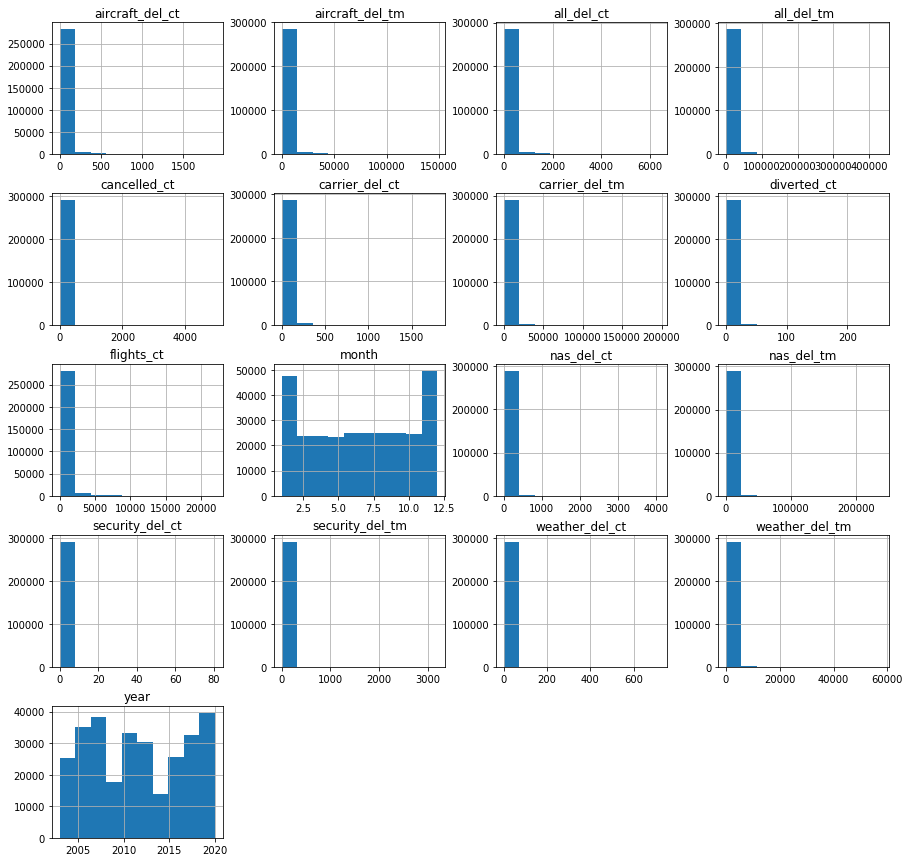

In [12]:
# plot histograms matrix
df.hist(figsize=[15,15]);

Let's look at the distribution of `flights_ct`

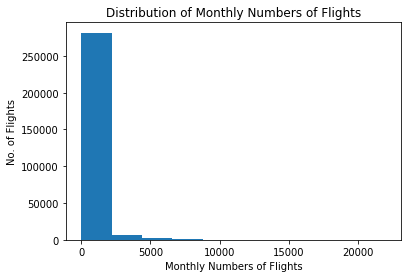

In [13]:
# distribution of monthly number of flights for an airline with an airport
plt.hist(df['flights_ct']);
plt.xlabel('Monthly Numbers of Flights')
plt.ylabel('No. of Flights')
plt.title('Distribution of Monthly Numbers of Flights');

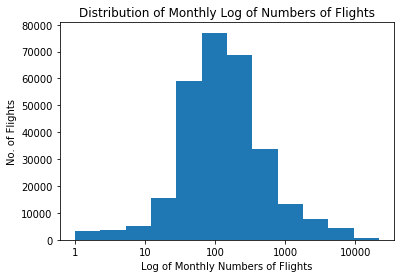

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.hist(np.log10(df['flights_ct']),bins=12);
plt.xlabel('Log of Monthly Numbers of Flights');
plt.ylabel('No. of Flights');
ticks=np.arange(0,5)
plt.xticks(ticks,10**ticks)
plt.title('Distribution of Monthly Log of Numbers of Flights');

Monthly number of flights for an airline with an airport has a right long-tailed distribution. When plotted on a log-scale, its distribution looks roughly unimodal, with one peak at 100 flights.

Next up, looking at the distribution of the total monthly delay time

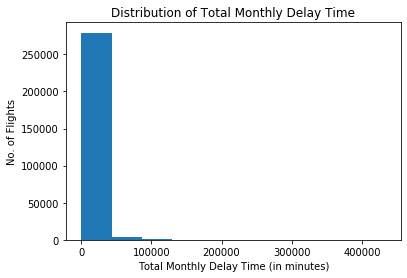

In [15]:
# define our subset of data
df_delayed=df[df['all_del_ct']>0][['all_del_tm']]
# distribution of the total delay time
plt.hist(df_delayed['all_del_tm']);
plt.xlabel('Total Monthly Delay Time (in minutes)')
plt.ylabel('No. of Flights')
plt.title('Distribution of Total Monthly Delay Time');

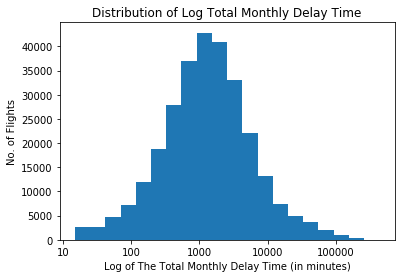

In [16]:
# the distribution is highly right skewed, we should use log scale
ticks=np.arange(1,6,1)
plt.hist(np.log10(df_delayed['all_del_tm']),bins=20);
plt.xlabel('Log of The Total Monthly Delay Time (in minutes)')
plt.ylabel('No. of Flights')
plt.xticks(ticks,10**ticks)
plt.title('Distribution of Log Total Monthly Delay Time');

The total monthly time (in minutes) of delayed flights for an airline with an airport has a right long-tailed distribution. When plotted on a log-scale, its distribution looks roughly unimodal, with one peak at a total of 1000 minutes.

Next up, looking at the distribution of the monthly delay time caused by carrier

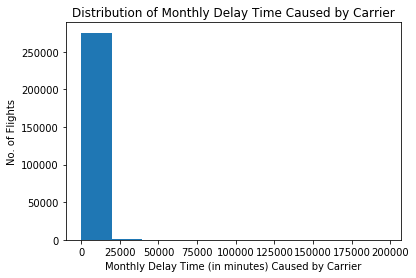

In [17]:
# define our subset of data
df_delayed_car=df[df['carrier_del_tm']>0][['carrier_del_tm','all_del_tm']]
# distribution of the total delay time caused by carrier
plt.hist(df_delayed_car['carrier_del_tm']);
plt.xlabel('Monthly Delay Time (in minutes) Caused by Carrier')
plt.ylabel('No. of Flights')
plt.title('Distribution of Monthly Delay Time Caused by Carrier');

the most frequent bin:(443.78373111235163,816.3727783361985)
the mode:601.9077649844662


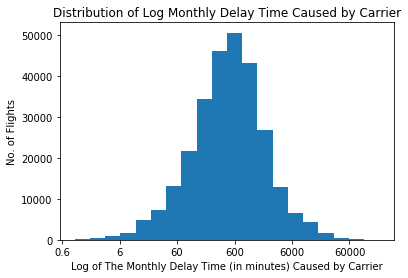

In [18]:
# the distribution is highly right skewed, we should use log scale
labels=[0.6,6,60,600,6000,60000]
n, bins, patches=plt.hist(np.log10(df_delayed_car['carrier_del_tm']),bins=20);
plt.xlabel('Log of The Monthly Delay Time (in minutes) Caused by Carrier')
plt.ylabel('No. of Flights')
plt.xticks(np.log10(labels),labels)
plt.title('Distribution of Log Monthly Delay Time Caused by Carrier');
# find the histogram peak
mode_index = n.argmax()
# the most frequent bin
print('the most frequent bin:(' + str(10**bins[mode_index]) + ',' + str(10**bins[mode_index+1]) + ')')
# the mode 
mode=10**((bins[mode_index] + bins[mode_index+1])/2)
print('the mode:'+ str(mode))

The total monthly Delay time (in minutes) caused by carrier has a right long-tailed distribution. When plotted on a log-scale, its distribution looks roughly unimodal, with one peak at monthly delay time of 600 minutes.

Next up, looking at the distribution of flights counts per year

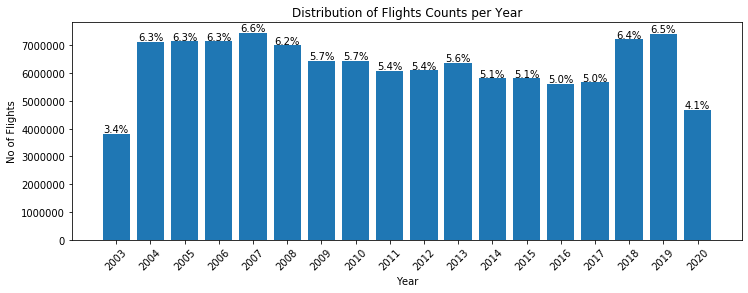

In [19]:
# distribution of flights counts per year
year_ct=df.groupby(['year'])['flights_ct'].sum()
ticks=year_ct.index
plt.figure(figsize = [12, 4]) 
plt.bar(ticks,year_ct)

for i in ticks:
    p = year_ct[i]
    pct_string = '{:0.1f}%'.format(100*p/sum(year_ct))
    plt.text(i, p+10**4.7, pct_string, ha='center')
    
plt.xticks(ticks,rotation=45)
plt.xlabel('Year')
plt.ylabel('No of Flights')
plt.title('Distribution of Flights Counts per Year');

It is clear that the year of 2007 has the highest number of flights and the year of 2020 has the lowest. Note that the year of 2003 has a number of flights less than year of 2020 but we can't take the year of 2003 into consideration because its data aren't available before June 2003.

#### Q-1: What are the top 5 airports that are home to more delays or cancellations?  

In [20]:
# sum of numbers of delayed and cancelled flights grouped by airport code
des_df=df.groupby(['airport_code'])[['all_del_ct', 'cancelled_ct']].sum()
des_df.head(5)

,all_del_ct,cancelled_ct
airport_code,,
ABE,13580,1905
ABI,8341,939
ABQ,98431,4867
ABR,650,120
ABY,3850,374


In [21]:
# find the top 5 airports with highest counts of delayed flights
top_delay_airports=des_df[['all_del_ct']].sort_values(by=['all_del_ct'], ascending=False)[:5]
print('The top destination airports received more delayes are:', top_delay_airports.index.tolist() )
display(top_delay_airports)
# find the top 5 airports with highest counts of cancelled flights
top_cancel_airports=des_df[['cancelled_ct']].sort_values(by=['cancelled_ct'], ascending=False)[:5]
print('The top destination airports received more cancellations are:', top_cancel_airports.index.tolist() )
top_cancel_airports

The top destination airports received more delayes are: ['ATL', 'ORD', 'DFW', 'LAX', 'DEN']


,all_del_ct
airport_code,
ATL,1284110
ORD,1231622
DFW,862874
LAX,724205
DEN,680172


The top destination airports received more cancellations are: ['ORD', 'DFW', 'ATL', 'LGA', 'EWR']


,cancelled_ct
airport_code,
ORD,182668
DFW,111064
ATL,110694
LGA,79715
EWR,72911


In [22]:
# let's find the monthly counts of delayed flights for top 5 delayed airports
df1=df[df.airport_code.isin(top_delay_airports.index)].groupby(['year','month','airport_code'])\
                                                    .sum()[['all_del_ct']].reset_index()
# let's find the monthly counts of cancelled flights for top 5 cancelled airports
df2=df[df.airport_code.isin(top_cancel_airports.index)].groupby(['year','month','airport_code'])\
                                                    .sum()[['cancelled_ct']].reset_index()


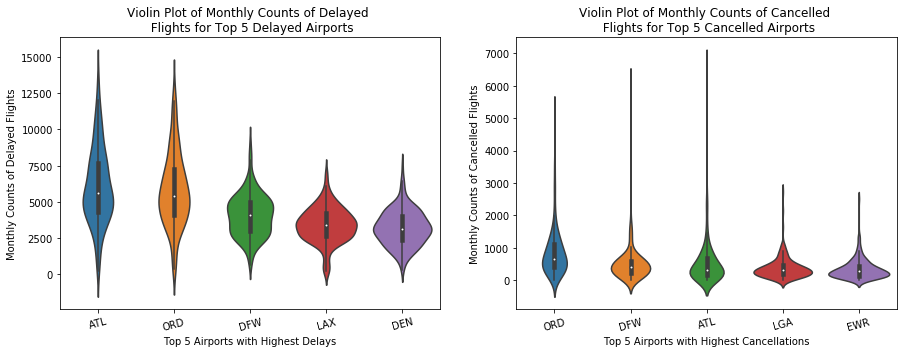

In [23]:
# violin plot of monthly counts of delayed flights for top 5 delayed airports
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sb.violinplot(data=df1,x='airport_code', y='all_del_ct',order=top_delay_airports.index)
plt.xticks(rotation=15)
plt.xlabel('Top 5 Airports with Highest Delays')
plt.ylabel('Monthly Counts of Delayed Flights')
plt.title('Violin Plot of Monthly Counts of Delayed \n Flights for Top 5 Delayed Airports');
# violin plot of monthly counts of cancelled flights for top 5 cancelled airports
plt.subplot(1,2,2)
sb.violinplot(data=df2,x='airport_code', y='cancelled_ct', order=top_cancel_airports.index)
plt.xticks(rotation=15)
plt.xlabel('Top 5 Airports with Highest Cancellations')
plt.ylabel('Monthly Counts of Cancelled Flights')
plt.title('Violin Plot of Monthly Counts of Cancelled \n Flights for Top 5 Cancelled Airports');

### Discuss the distributions of variables of interest. Were there any unusual points? Did we need to perform any transformations?

> For the total monthly time of delayed flights for an airline with an airport, it has a right long-tailed distribution. But when it is plotted on a log-scale, its distribution looks roughly unimodal, with one peak at a total of 1000 minutes.

> For the total monthly Delay time  caused by carrier has a right long-tailed distribution. When plotted on a log-scale, its distribution looks roughly unimodal, with one peak at monthly delay time of 600 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I did some adjust for the distribution of both total delayed time and delayed time caused by carrier in which I couldn't be able to make log scale since there are zero time values, by then we exclude all of zero.

## Bivariate Exploration

> In this section, I will create plots of two variables to investigate relationships between our interested variables and answer some interested questions 

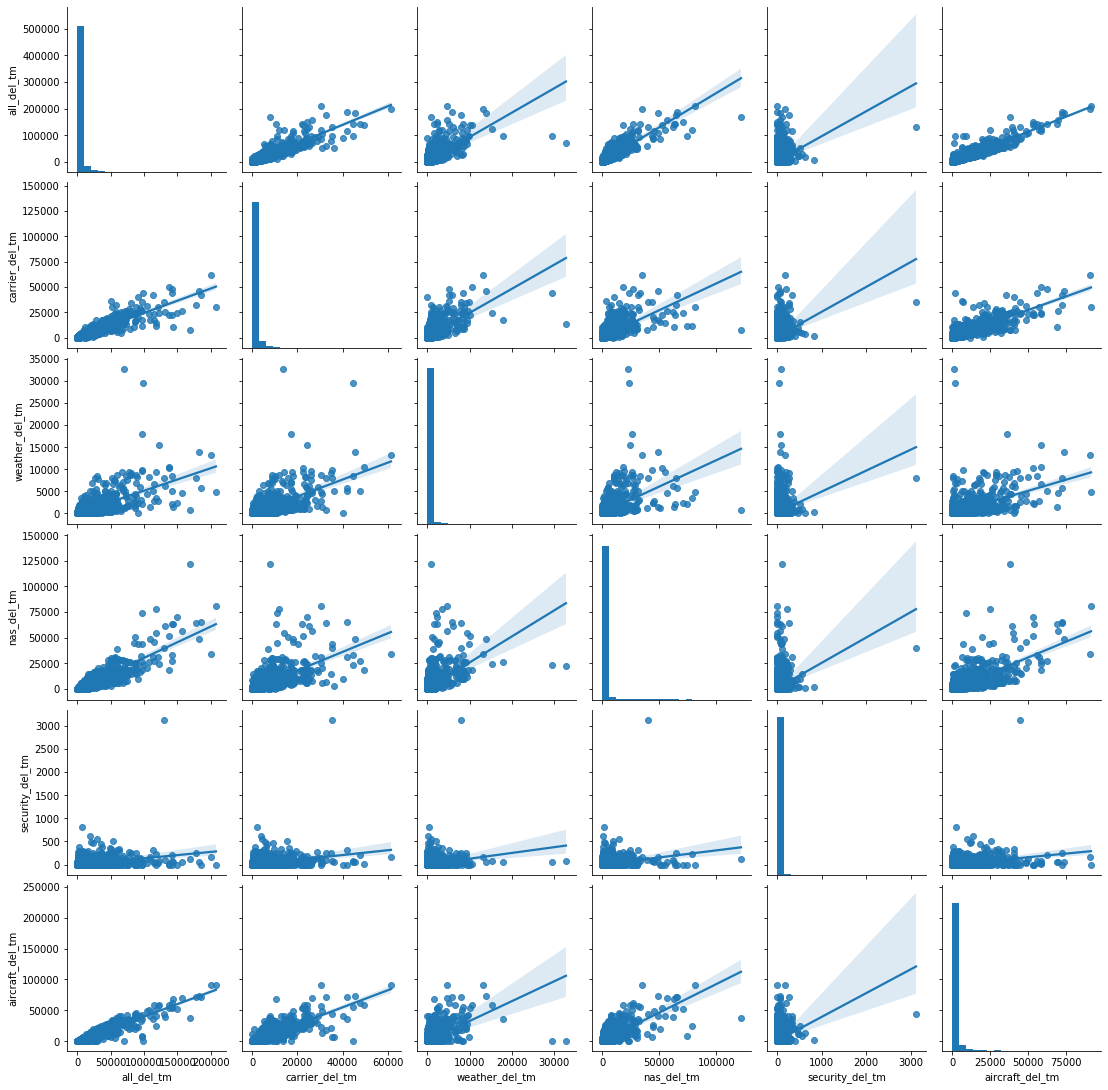

In [24]:
# Let's start with looking at the relationship between pairs of time variables using scatter plot matrices
time_cols=[ 'all_del_tm', 'carrier_del_tm', 'weather_del_tm', 'nas_del_tm', 'security_del_tm', 'aircraft_del_tm']
g=sb.PairGrid(data=df.sample(10000), vars=time_cols)
g=g.map_offdiag(sb.regplot) # or plt.scatter but without trend lines
g.map_diag(plt.hist,bins=20);

Now let's look at the relationship between the total time of delayed flights `all_del_tm` and the total delay time caused by carrier `carrier_del_tm`.

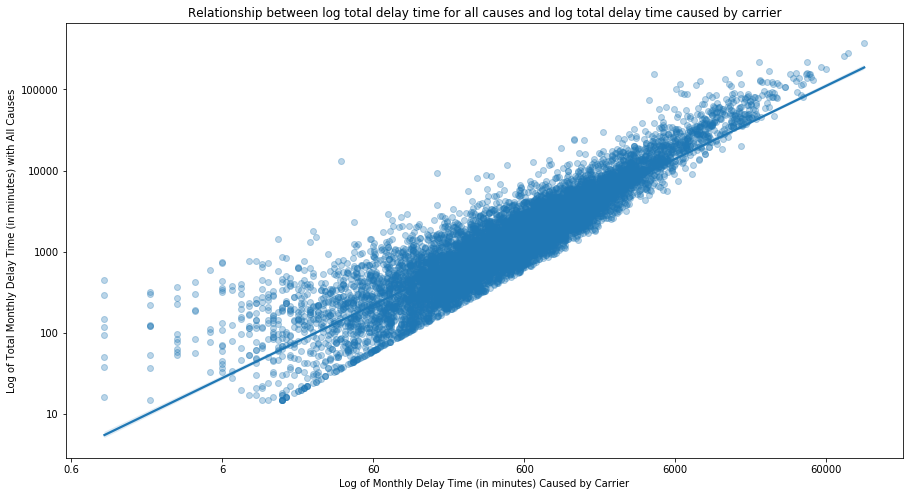

In [25]:
# scatter plot with trend line for the total delay time for all causes and the total delay time caused by carrier
plt.figure(figsize=[15,8])
df_del_car_sample=df_delayed_car.sample(10000)
sb.regplot(np.log10(df_del_car_sample.carrier_del_tm), np.log10(df_del_car_sample.all_del_tm), scatter_kws={'alpha':0.3})
plt.ylabel('Log of Total Monthly Delay Time (in minutes) with All Causes')
plt.xlabel('Log of Monthly Delay Time (in minutes) Caused by Carrier')
plt.title('Relationship between log total delay time for all causes and log total delay time caused by carrier')
yticks=np.arange(1,6,1)
plt.yticks(yticks,10**yticks)
xlabels=[0.6,6,60,600,6000,60000]
plt.xticks(np.log10(xlabels),xlabels);

It is clear that the the total time of delayed flights is strongly increased when the total delay time caused by carrier increased. It means that there is a strong positive correlation between the two variables.

#### Q-2: Which year has the worst flights delays?

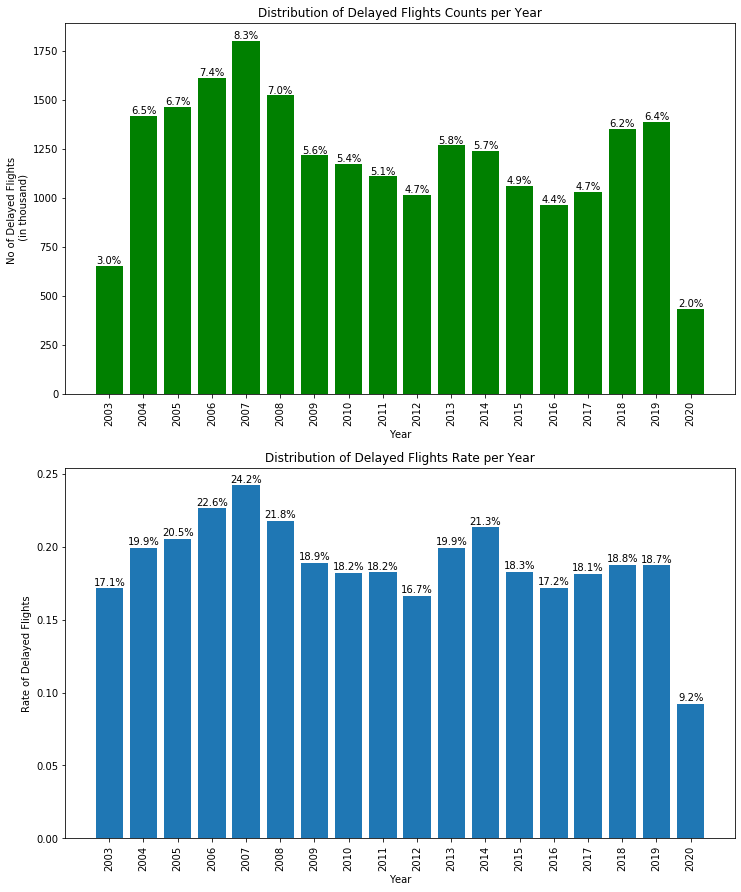

In [26]:
plt.figure(figsize = [12, 15]) 
plt.subplot(2,1,1)
# distribution of no of delayed flights per year
year_ct=df.groupby(['year'])['all_del_ct'].sum()
ticks=year_ct.index
plt.bar(ticks,year_ct,color='green')
plt.title('Distribution of Delayed Flights Counts per Year')
for i in ticks:
    p = year_ct[i]
    pct_string = '{:0.1f}%'.format(100*p/sum(year_ct))
    plt.text(i, p+10**4, pct_string, ha='center')

plt.xticks(ticks,rotation=90)

plt.xlabel('Year')
plt.ylabel('No of Delayed Flights \n (in thousand)');
ylabels=np.arange(0,2000,250)
plt.yticks(1000*ylabels,ylabels)

plt.subplot(2,1,2)
# distribution of the rate of delayed flights per year
year_ct=df.groupby(['year'])['flights_ct'].sum()
year_delay_ct=df.groupby(['year'])['all_del_ct'].sum()
year_rate=year_delay_ct/year_ct
plt.bar(ticks,year_rate)
plt.title('Distribution of Delayed Flights Rate per Year')
for i in ticks:
    p = year_rate[i]
    pct_string = '{:0.1f}%'.format(100*p)
    plt.text(i, p+0.002, pct_string, ha='center')


plt.xticks(ticks,rotation=90)
plt.xlabel('Year')
plt.ylabel('Rate of Delayed Flights');

it is clear that the year of 2007 has the highest number and rate of delayed flights. So we could call 2007 the worst year of flights delays.

#### Q-3: Which year has the highest rate of cancelled flights?

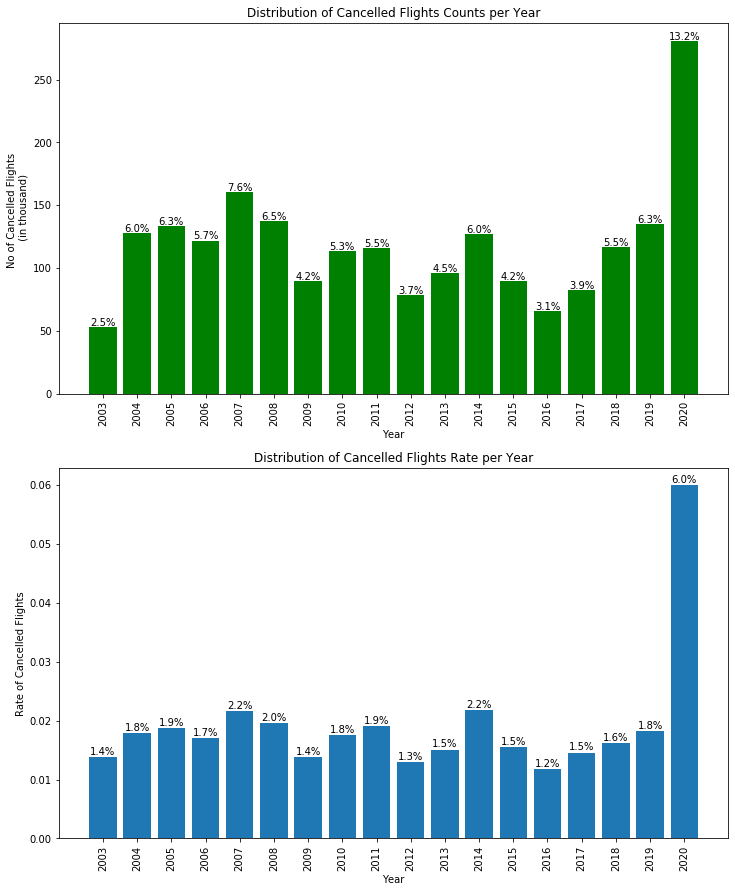

In [27]:
plt.figure(figsize = [12, 15]) 

plt.subplot(2,1,1)
# distribution of no of cancelled flights per year
year_ct=df.groupby(['year'])['cancelled_ct'].sum()
ticks=year_ct.index
plt.bar(ticks,year_ct,color='green')
plt.title('Distribution of Cancelled Flights Counts per Year')
for i in ticks:
    p = year_ct[i]
    pct_string = '{:0.1f}%'.format(100*p/sum(year_ct))
    plt.text(i, p+10**3, pct_string, ha='center')
    
plt.xticks(ticks,rotation=90)
plt.xlabel('Year')
plt.ylabel('No of Cancelled Flights \n (in thousand)');
ylabels=np.arange(0,300,50)
plt.yticks(1000*ylabels,ylabels)

plt.subplot(2,1,2)
# distribution of the rate of cancelled flights per year
year_ct=df.groupby(['year'])['flights_ct'].sum()
year_cancel_ct=df.groupby(['year'])['cancelled_ct'].sum()
year_rate=year_cancel_ct/year_ct
plt.bar(ticks,year_rate)
plt.title('Distribution of Cancelled Flights Rate per Year')
for i in ticks:
    p = year_rate[i]
    pct_string = '{:0.1f}%'.format(100*p)
    plt.text(i, p+0.0004, pct_string, ha='center')


plt.xticks(ticks,rotation=90)
plt.xlabel('Year')
plt.ylabel('Rate of Cancelled Flights');

it is clear that the year of 2020 has the greatest numbers and rate of cancelled flights. So we could call 2020 the worst year of cancelled flights which is not surprised for me because it is the year of COVID-19.

#### Q-4: What are the most/least efficient airlines? and what are the top 5 efficient airlines?

 `carrier_del_tm` and `aircraft_del_tm` are two time delay causes that committed directly by the airline itself, accordingly we can measure the efficiency rate of an airline by calculating 
 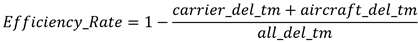
 
 

Therefore, an airline is getting to be more efficient if it has a higher `efficiency_rate` and visa versa.

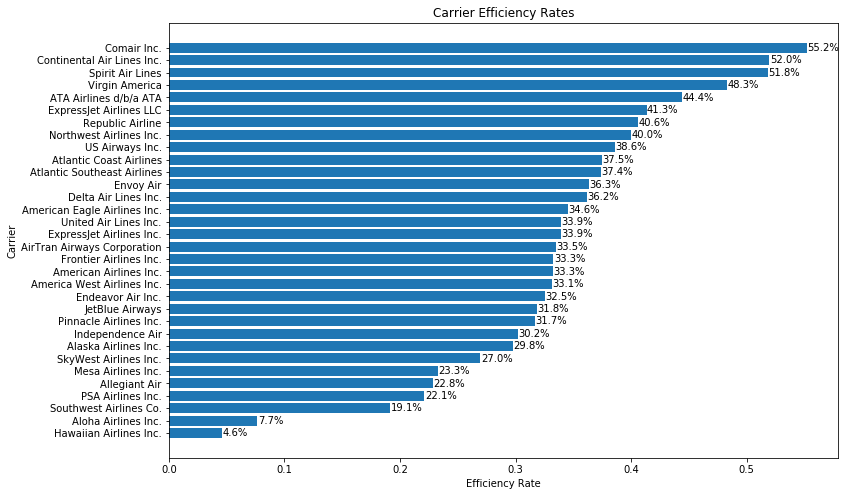

In [28]:
# Calculate efficiency rate for each carrier
sum_tm=df.groupby(['carrier_name'])[['all_del_tm','carrier_del_tm','aircraft_del_tm']].sum()
sum_tm['eff_rate']= 1-(sum_tm.carrier_del_tm+sum_tm.aircraft_del_tm)/sum_tm.all_del_tm
sum_tm=sum_tm.sort_values(by = ['eff_rate'], ascending = True)
# plot horizontal bar chart
labels=sum_tm.index
ticks=np.arange(len(sum_tm.index))
plt.figure(figsize = [12, 8])
plt.barh(ticks,sum_tm['eff_rate'])

for i in ticks:
    p = sum_tm['eff_rate'][i]
    pct_string = '{:0.1f}%'.format(100*p)
    plt.text(p+0.0004,i, pct_string, va='center')


plt.yticks(ticks,labels)
plt.xlabel('Efficiency Rate')
plt.ylabel('Carrier')
plt.title('Carrier Efficiency Rates');

It is clear that "Comair Inc." is most efficient airline and "Hawaiian Airlines Inc." is the least efficient one.

In [29]:
# return the top 5 efficient airlines
top_airlines=sum_tm.sort_values(by = ['eff_rate'], ascending = False).index[:5].tolist()
print('The top 5 efficient airlines are: \n',top_airlines)

The top 5 efficient airlines are: 
 ['Comair Inc.', 'Continental Air Lines Inc.', 'Spirit Air Lines', 'Virgin America', 'ATA Airlines d/b/a ATA']


### Talk about some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> With bivariate explorations, I investigated the relationship between the total time (minutes) of delayed flights and the time of delayed flights caused by carrier itself. we found that there is a strong positive correlation between the two variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Of course, I found that the total time of delayed flights is strongly affected with busy aircraft delay time too.

## Multivariate Exploration

> In this section, I will create plots of three variables and investigate relationships between pairs of time variables in our data.

#### Q-5: which cause variable is mostly affected the total delay time?

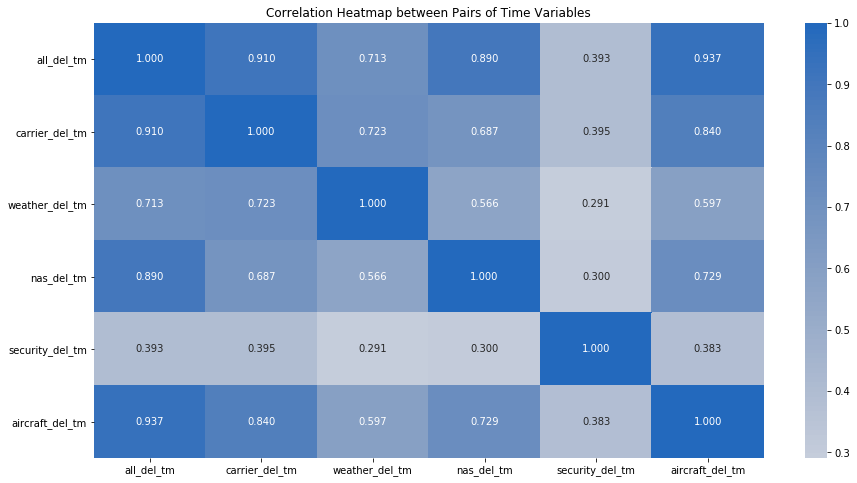

In [30]:
# correlation heatmap between pairs of time variables only
plt.figure(figsize = [15, 8])
sb.heatmap(df[time_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap between Pairs of Time Variables')
plt.show()

From the above correlation plot matrices, we easily can notice that the total time of delayed flights is affected mostly by busy aircraft delay time and by delay time of their airlines.

#### Q-6: For permanent airlines only, which one has the best improvements year by year?

In [31]:
# list of all permanent carriers that starting from 2003 up to 2020
start_car=df[df.year==2003]['carrier_name'].unique()
cont_car=df[df.year==2020]['carrier_name'].unique()
all_time_car=[value for value in cont_car if value in start_car] 
all_time_car

['American Airlines Inc.',
 'Alaska Airlines Inc.',
 'JetBlue Airways',
 'Delta Air Lines Inc.',
 'Hawaiian Airlines Inc.',
 'SkyWest Airlines Inc.',
 'United Air Lines Inc.',
 'Southwest Airlines Co.']

In [32]:
# Calculate the yearly efficiency rate for each carrier
sum_tm=df[df.carrier_name.isin(all_time_car)].groupby(['carrier_name','year'])\
                                            [['all_del_tm','carrier_del_tm','aircraft_del_tm']].sum()
sum_tm['eff_rate']= 1-(sum_tm.carrier_del_tm+sum_tm.aircraft_del_tm)/sum_tm.all_del_tm
sum_tm.reset_index(inplace=True)

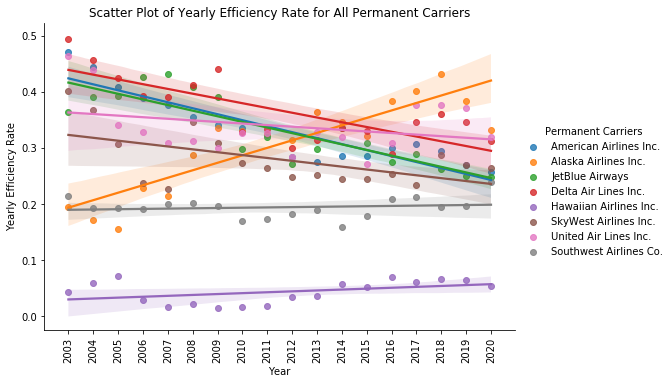

In [33]:
# Plot scatter chart with trend
g=sb.FacetGrid(data=sum_tm, hue='carrier_name', hue_order=all_time_car, height=5, aspect=1.5)
g=g.map(sb.regplot, 'year', 'eff_rate')
g.add_legend(title='Permanent Carriers')
plt.xticks(np.arange(2003,2021),rotation=90)
plt.xlabel('Year')
plt.ylabel('Yearly Efficiency Rate')
plt.title('Scatter Plot of Yearly Efficiency Rate for All Permanent Carriers');

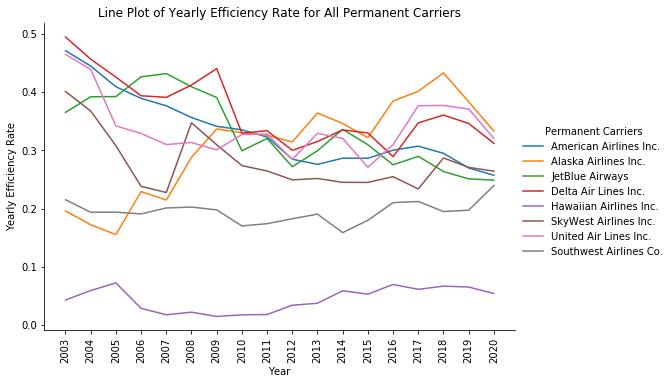

In [34]:
# Plot line chart
g=sb.FacetGrid(data=sum_tm, hue='carrier_name', hue_order=all_time_car, height=5, aspect=1.5)
g=g.map(sb.lineplot, 'year', 'eff_rate')
g.add_legend(title='Permanent Carriers')
plt.xticks(np.arange(2003,2021),rotation=90)
plt.xlabel('Year')
plt.ylabel('Yearly Efficiency Rate')
plt.title('Line Plot of Yearly Efficiency Rate for All Permanent Carriers');

Clearly, "Alaska Airlines Inc." has the highest increasing trend which means that "Alaska Airlines Inc." has been improving their services over time perfectly more than others carriers.

#### Q-7: What are the preferred times for flights to occur?

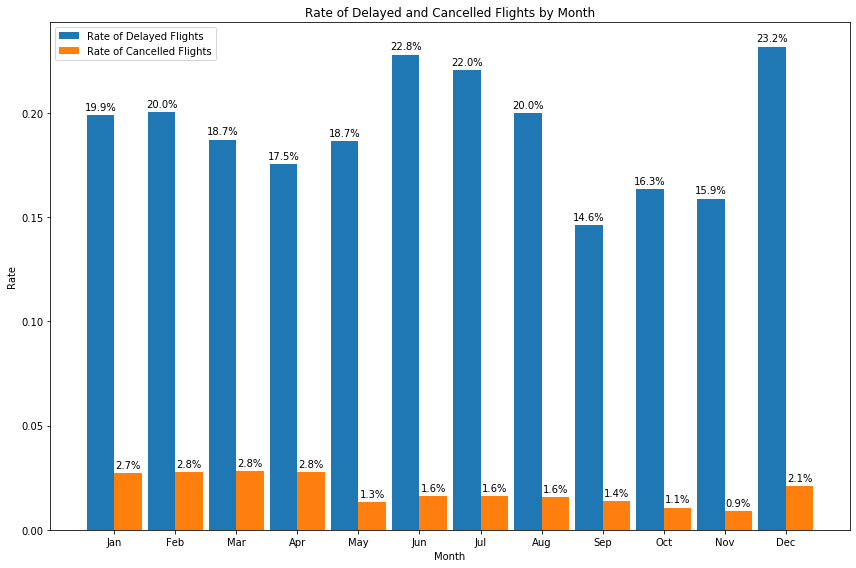

In [35]:
# Calculate monthly rate of delayed and cancelled flights
month_ct=df.groupby(['month'])['flights_ct'].sum()
month_delay_ct=df.groupby(['month'])[['all_del_ct','cancelled_ct']].sum()
month_rate=month_delay_ct.div(month_ct, axis=0).reset_index()

x = np.arange(12)  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, month_rate.all_del_ct, width, label='Rate of Delayed Flights')
rects2 = ax.bar(x + width/2, month_rate.cancelled_ct, width, label='Rate of Cancelled Flights')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Rate')
ax.set_xlabel('Month')
ax.set_title('Rate of Delayed and Cancelled Flights by Month')
ax.set_xticks(x)
Labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(Labels) # you can put 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.1f}%'.format(100*height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

it is clear that September is the perfect month has fewest delays, although November has the least flight cancellation rate.

### Talking about some of the relationships I observed in this part of the investigation. Were there features that strengthened each other in terms of looking at my feature(s) of interest?

> As I was interested in the relationship between the total time of delayed flights `all_del_tm` and the total delay time caused by carrier `carrier_del_tm`. Using correlation heatmap between pairs of time variables, I found that the total delay time caused by carrier `carrier_del_tm` is one of the strongest effect of the total time of delayed flights `all_del_tm`.

### Were there any interesting or surprising interactions between features?

> Yes, I am very surprised that the busy aircraft delay time `aircraft_del_tm` is affected the total time of delayed flights `all_del_tm` strongly too side by side as the total delay time caused by carrier `carrier_del_tm`.